In [1]:
#AICTE GFG

In [2]:
!git clone https://github.com/GaneshDGiri/AICTE.git

Cloning into 'AICTE'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 13 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (13/13), 1.59 MiB | 6.36 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [5]:
#Step 2


In [6]:
excel_file = '/content/af60b10b8dad38110304.xlsx'
years=range(2010, 2017)

In [7]:
years[0]

2010

In [9]:
import pandas as pd

xls = pd.ExcelFile(excel_file)
print(xls.sheet_names)



['Cover', 'Contents', 'Data Dictionary', 'Sources', 'LCIA Factors of Other GHGs', '2016_Summary_Commodity', '2015_Summary_Commodity', '2014_Summary_Commodity', '2013_Summary_Commodity', '2012_Summary_Commodity', '2011_Summary_Commodity', '2010_Summary_Commodity', '2016_Summary_Industry', '2015_Summary_Industry', '2014_Summary_Industry', '2013_Summary_Industry', '2012_Summary_Industry', '2011_Summary_Industry', '2010_Summary_Industry', '2016_Detail_Commodity', '2015_Detail_Commodity', '2014_Detail_Commodity', '2013_Detail_Commodity', '2012_Detail_Commodity', '2011_Detail_Commodity', '2010_Detail_Commodity', '2016_Detail_Industry', '2015_Detail_Industry', '2014_Detail_Industry', '2013_Detail_Industry', '2012_Detail_Industry', '2011_Detail_Industry', '2010_Detail_Industry', 'Sheet1']


In [10]:
df_1 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Detail_Commodity')
df_1.head()


,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1


In [11]:
df_2 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Detail_Industry')
df_2.head()


,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,Oilseed farming,carbon dioxide,"kg/2018 USD, purchaser price",0.414,0.073,0.487,NaN,4,3,1,4,1
1,1111A0,Oilseed farming,methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,Oilseed farming,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,Oilseed farming,other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,Grain farming,carbon dioxide,"kg/2018 USD, purchaser price",0.680,0.082,0.762,NaN,4,3,1,4,1


In [12]:
all_data = []

for year in years:
  try:
    df_com = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Commodity')
    df_ind = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Industry')

    df_com['Source'] = 'Commodity'
    df_ind ['Source'] = 'Industry'
    df_com['Year'] = df_ind ['Year'] = year

    df_com.columns =  df_com.columns.str.strip()
    df_ind.columns = df_ind.columns.str.strip()

    df_com.rename(columns={
        'Commodity Code': 'Code',
        'Commodity Name': 'Name'
    }, inplace=True)

    df_ind.rename(columns={
        'Industry Code': 'Code',
        'Industry Name': 'Name'
         },inplace=True)

    all_data.append(pd.concat([df_com, df_ind], ignore_index=True))


  except Exception as e:
    print(f"Error processing year {year}: {e}")

In [13]:
combined_df = pd.concat(all_data, ignore_index=True)
display(combined_df.head())

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1,Commodity,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2010
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1,Commodity,2010
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1,Commodity,2010


In [14]:
all_data[3]

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.373,0.072,0.444,NaN,4,3,1,4,1,Commodity,2013
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2013
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2013
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,4,1,Commodity,2013
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.722,0.079,0.801,NaN,4,3,1,4,1,Commodity,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151,813B00,"Civic, social, professional, and similar organ...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.008,0.000,0.008,NaN,4,3,1,5,1,Industry,2013
3152,814000,Private households,carbon dioxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013
3153,814000,Private households,methane,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013
3154,814000,Private households,nitrous oxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013


In [ ]:
len(all_data)

7

In [15]:
df = pd.concat(all_data, ignore_index=True)
df.head()

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1,Commodity,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2010
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1,Commodity,2010
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1,Commodity,2010


In [16]:
len(df)

22092

In [17]:
#Step 3

In [18]:
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Code,0
Name,0
Substance,0
Unit,0
Supply Chain Emission Factors without Margins,0
Margins of Supply Chain Emission Factors,0
Supply Chain Emission Factors with Margins,0
Unnamed: 7,22092
DQ ReliabilityScore of Factors without Margins,0
DQ TemporalCorrelation of Factors without Margins,0


In [19]:
#Week 2

In [20]:
df.drop(columns=['Unnamed: 7'],inplace=True)

In [21]:
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22092 non-null  object 
 1   Name                                                    22092 non-null  object 
 2   Substance                                               22092 non-null  object 
 3   Unit                                                    22092 non-null  object 
 4   Supply Chain Emission Factors without Margins           22092 non-null  float64
 5   Margins of Supply Chain Emission Factors                22092 non-null  float64
 6   Supply Chain Emission Factors with Margins              22092 non-null  float64
 7   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 8   DQ TemporalCorrelation of Factors wi

In [22]:
df.describe()

,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Year
count,22092.000000,22092.000000,22092.000000,22092.000000,22092.000000,22092.0,22092.000000,22092.0,22092.000000
mean,0.084807,0.012857,0.097681,3.308030,2.571429,1.0,2.632129,1.0,2013.000000
std,0.267039,0.078720,0.288992,0.499643,0.494883,0.0,1.135661,0.0,2.000045
min,0.000000,0.000000,0.000000,2.000000,2.000000,1.0,1.000000,1.0,2010.000000
25%,0.000000,0.000000,0.000000,3.000000,2.000000,1.0,1.000000,1.0,2011.000000
50%,0.002000,0.000000,0.003000,3.000000,3.000000,1.0,3.000000,1.0,2013.000000
75%,0.044000,0.000000,0.052000,4.000000,3.000000,1.0,3.000000,1.0,2015.000000
max,7.228000,3.349000,7.290000,4.000000,3.000000,1.0,5.000000,1.0,2016.000000


In [23]:
df.isnull().sum()

,0
Code,0
Name,0
Substance,0
Unit,0
Supply Chain Emission Factors without Margins,0
Margins of Supply Chain Emission Factors,0
Supply Chain Emission Factors with Margins,0
DQ ReliabilityScore of Factors without Margins,0
DQ TemporalCorrelation of Factors without Margins,0
DQ GeographicalCorrelation of Factors without Margins,0


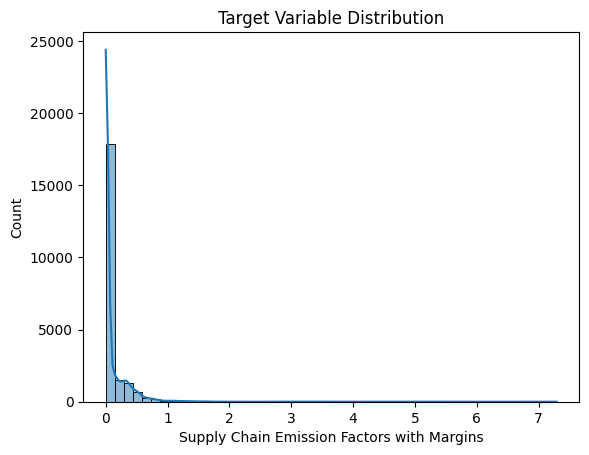

In [24]:
sns.histplot(df['Supply Chain Emission Factors with Margins'], bins=50, kde=True)
plt.title('Target Variable Distribution')
plt.show()

In [25]:
print(df['Substance'].value_counts())

Substance
carbon dioxide    5523
methane           5523
nitrous oxide     5523
other GHGs        5523
Name: count, dtype: int64


In [26]:
print(df['Unit'].value_counts())

Unit
kg/2018 USD, purchaser price         16569
kg CO2e/2018 USD, purchaser price     5523
Name: count, dtype: int64


In [27]:
print(df['Unit'].value_counts())

Unit
kg/2018 USD, purchaser price         16569
kg CO2e/2018 USD, purchaser price     5523
Name: count, dtype: int64


In [28]:
print(df['Source'].value_counts())

Source
Industry     11060
Commodity    11032
Name: count, dtype: int64


In [29]:
print(df['Unit'].unique())

['kg/2018 USD, purchaser price' 'kg CO2e/2018 USD, purchaser price']


In [ ]:
print(df['Source'].value_counts)

<bound method IndexOpsMixin.value_counts of 0        Commodity
1        Commodity
2        Commodity
3        Commodity
4        Commodity
           ...    
22087     Industry
22088     Industry
22089     Industry
22090     Industry
22091     Industry
Name: Source, Length: 22092, dtype: object>


In [30]:
df['Substance'].unique()

array(['carbon dioxide', 'methane', 'nitrous oxide', 'other GHGs'],
      dtype=object)

In [31]:
Substance_map = {
    'carbon dioxide': 0,
    'methane': 1,
    'nitrous oxide': 2,
    'other GHGs': 3
}


In [32]:
df['Substance'] = df['Substance'].map(Substance_map)

In [33]:
df['Substance'].unique()

array([0, 1, 2, 3])

In [34]:
print(df['Unit'].unique())


['kg/2018 USD, purchaser price' 'kg CO2e/2018 USD, purchaser price']


In [35]:
unit_map={'kg/2018 USD, purchaser price':0,
          'kgCO2e/2018 USD, purchaser price':1,}

In [36]:
df['Unit']=df['Unit'].map(unit_map)

In [37]:
print(df['Unit'].unique())

[ 0. nan]


In [38]:
print(df['Source'].unique())

['Commodity' 'Industry']


In [39]:
source_map = {'commodity': 0, 'industry': 1}


In [40]:
df['Source']=df['Source'].map(source_map)

In [42]:
print(df['Source'].unique())

[nan]


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22092 non-null  object 
 1   Name                                                    22092 non-null  object 
 2   Substance                                               22092 non-null  int64  
 3   Unit                                                    16569 non-null  float64
 4   Supply Chain Emission Factors without Margins           22092 non-null  float64
 5   Margins of Supply Chain Emission Factors                22092 non-null  float64
 6   Supply Chain Emission Factors with Margins              22092 non-null  float64
 7   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 8   DQ TemporalCorrelation of Factors wi

In [44]:
df.Code.unique()


array(['1111A0', '1111B0', '111200', '111300', '111400', '111900',
       '112120', '1121A0', '112300', '112A00', '113000', '114000',
       '115000', '211000', '212100', '212230', '2122A0', '212310',
       '2123A0', '213111', '21311A', '221100', '221200', '221300',
       '230301', '230302', '233210', '233230', '233240', '233262',
       '2332A0', '2332C0', '2332D0', '233411', '233412', '2334A0',
       '311111', '311119', '311210', '311221', '311224', '311225',
       '311230', '311300', '311410', '311420', '311513', '311514',
       '31151A', '311520', '311615', '31161A', '311700', '311810',
       '3118A0', '311910', '311920', '311930', '311940', '311990',
       '312110', '312120', '312130', '312140', '312200', '313100',
       '313200', '313300', '314110', '314120', '314900', '315000',
       '316000', '321100', '321200', '321910', '3219A0', '322110',
       '322120', '322130', '322210', '322220', '322230', '322291',
       '322299', '323110', '323120', '324110', '324121', '3241

In [45]:
df.Name.unique()

array(['Fresh soybeans, canola, flaxseeds, and other oilseeds',
       'Fresh wheat, corn, rice, and other grains',
       'Fresh vegetables, melons, and potatoes',
       'Fresh fruits and tree nuts',
       'Greenhouse crops, mushrooms, nurseries, and flowers',
       'Tobacco, cotton, sugarcane, peanuts, sugar beets, herbs and spices, and other crops',
       'Dairies', 'Cattle ranches and feedlots', 'Poultry farms',
       'Animal farms and aquaculture ponds (except cattle and poultry)',
       'Timber and raw forest products', 'Wild-caught fish and game',
       'Agriculture and forestry support', 'Unrefined oil and gas',
       'Coal', 'Copper, nickel, lead, and zinc',
       'Iron, gold, silver, and other metal ores', 'Dimensional stone',
       'Sand, gravel, clay, phosphate, other nonmetallic minerals',
       'Well drilling', 'Other support activities for mining',
       'Electricity', 'Natural gas',
       'Drinking water and wastewater treatment',
       'Nonresidential mai

In [46]:
len(df.Name.unique())

713

In [47]:
#step 3


In [48]:
top_emitters = df[['Name', 'Supply Chain Emission Factors with Margins']].groupby('Name').sum().sort_values(by='Supply Chain Emission Factors with Margins', ascending=False).head(10)
top_emitters = top_emitters.reset_index()


In [49]:
top_emitters

,Name,Supply Chain Emission Factors with Margins
0,Cement manufacturing,47.213
1,Cement,37.099
2,"Electric power generation, transmission, and d...",34.170
3,Electricity,28.452
4,"Dolls, toys, and games",23.301
5,Lime and gypsum products,22.863
6,Lime and gypsum product manufacturing,22.391
7,Alumina refining and primary aluminum production,20.308
8,Industrial gas manufacturing,17.162
9,Compressed Gases,15.111


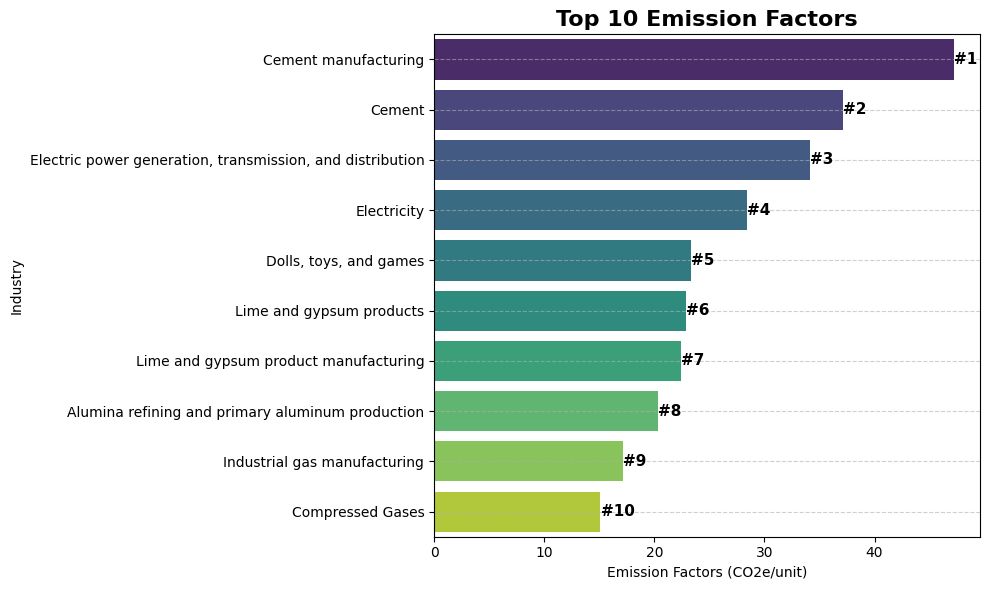

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.barplot(
    x='Supply Chain Emission Factors with Margins',
    y='Name',
    data=top_emitters,
    hue='Name',
    palette='viridis'
)

# Add rankings
for i, (value, name) in enumerate(zip(top_emitters['Supply Chain Emission Factors with Margins'], top_emitters['Name']), start=1):
    plt.text(
        value + 0.01, i - 1,  # Adjust x and y position
        f'#{i}',
        va='center',
        fontsize=11,
        fontweight='bold',
        color='black'
    )

# Add labels and formatting
plt.title('Top 10 Emission Factors', fontsize=16, fontweight='bold')
plt.xlabel('Emission Factors (CO2e/unit)')
plt.ylabel('Industry')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


In [51]:
#step4

In [52]:
#drop
df.drop(columns=['Code'],inplace=True)

In [53]:
df.head(1)


,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,"Fresh soybeans, canola, flaxseeds, and other o...",0,0.0,0.398,0.073,0.47,4,3,1,4,1,NaN,2010


In [54]:
df.shape

(22092, 13)

In [55]:
x=df.drop(columns=['Supply Chain Emission Factors with Margins'])
y=df['Supply Chain Emission Factors with Margins']

In [56]:
x.head()

,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,"Fresh soybeans, canola, flaxseeds, and other o...",0,0.0,0.398,0.073,4,3,1,4,1,NaN,2010
1,"Fresh soybeans, canola, flaxseeds, and other o...",1,0.0,0.001,0.001,4,3,1,1,1,NaN,2010
2,"Fresh soybeans, canola, flaxseeds, and other o...",2,0.0,0.002,0.000,4,3,1,4,1,NaN,2010
3,"Fresh soybeans, canola, flaxseeds, and other o...",3,NaN,0.002,0.000,3,3,1,3,1,NaN,2010
4,"Fresh wheat, corn, rice, and other grains",0,0.0,0.659,0.081,4,3,1,4,1,NaN,2010


In [57]:
y.head()

,Supply Chain Emission Factors with Margins
0,0.470
1,0.002
2,0.002
3,0.002
4,0.740


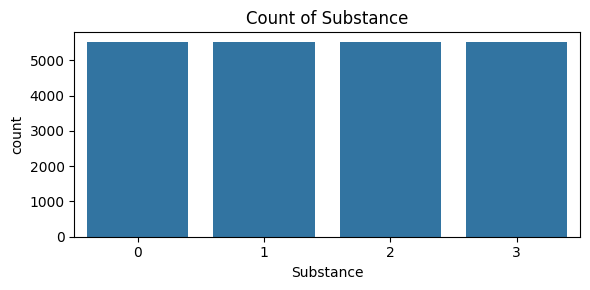

In [58]:
#count substance
plt.figure(figsize=(6, 3))
sns.countplot(x=df["Substance"])
plt.title("Count of Substance")
plt.xticks()
plt.tight_layout()
plt.show()

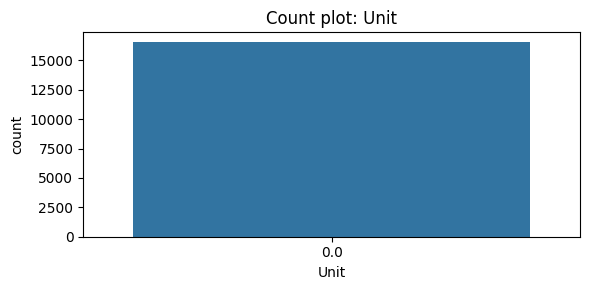

In [59]:
#count Unit
plt.figure(figsize=(6, 3))
sns.countplot(x=df["Unit"])
plt.title("Count plot: Unit")
plt.xticks()
plt.tight_layout()
plt.show()

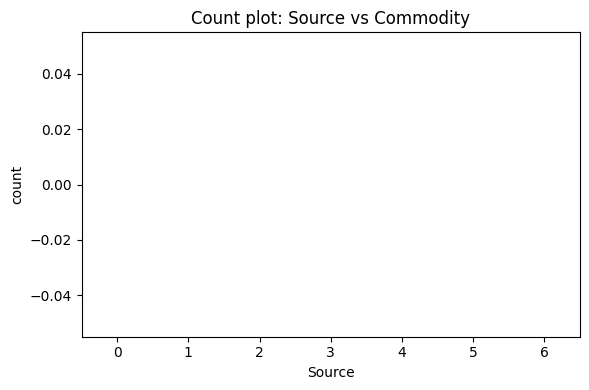

In [60]:
#count Source
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Source"])
plt.title("Count plot: Source vs Commodity")
plt.xticks()
plt.tight_layout()
plt.show()

In [61]:
df.columns

Index(['Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [62]:
#multivariate Analysis

In [63]:
#corelation heatmap

In [64]:
df.select_dtypes(include=['number']).corr()

,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
Substance,1.000000e+00,NaN,-0.391851,-0.218400,-0.421603,0.095092,-3.667637e-15,NaN,0.198415,NaN,NaN,3.827499e-15
Unit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Supply Chain Emission Factors without Margins,-3.918505e-01,NaN,1.000000,0.143005,0.962971,-0.098000,9.283870e-03,NaN,0.148410,NaN,NaN,-1.183582e-02
Margins of Supply Chain Emission Factors,-2.184002e-01,NaN,0.143005,1.000000,0.404541,-0.069598,7.953109e-03,NaN,0.086335,NaN,NaN,-9.009608e-03
Supply Chain Emission Factors with Margins,-4.216032e-01,NaN,0.962971,0.404541,1.000000,-0.109494,1.074848e-02,NaN,0.160574,NaN,NaN,-1.339737e-02
DQ ReliabilityScore of Factors without Margins,9.509190e-02,NaN,-0.098000,-0.069598,-0.109494,1.000000,-2.170715e-02,NaN,0.073583,NaN,NaN,4.190127e-02
DQ TemporalCorrelation of Factors without Margins,-3.667637e-15,NaN,0.009284,0.007953,0.010748,-0.021707,1.000000e+00,NaN,-0.030607,NaN,NaN,-8.660254e-01
DQ GeographicalCorrelation of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DQ TechnologicalCorrelation of Factors without Margins,1.984154e-01,NaN,0.148410,0.086335,0.160574,0.073583,-3.060675e-02,NaN,1.000000,NaN,NaN,3.987891e-02
DQ DataCollection of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 13 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Name                                                    22092 non-null  object 
 1   Substance                                               22092 non-null  int64  
 2   Unit                                                    16569 non-null  float64
 3   Supply Chain Emission Factors without Margins           22092 non-null  float64
 4   Margins of Supply Chain Emission Factors                22092 non-null  float64
 5   Supply Chain Emission Factors with Margins              22092 non-null  float64
 6   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 7   DQ TemporalCorrelation of Factors without Margins       22092 non-null  int64  
 8   DQ GeographicalCorrelation of Factor

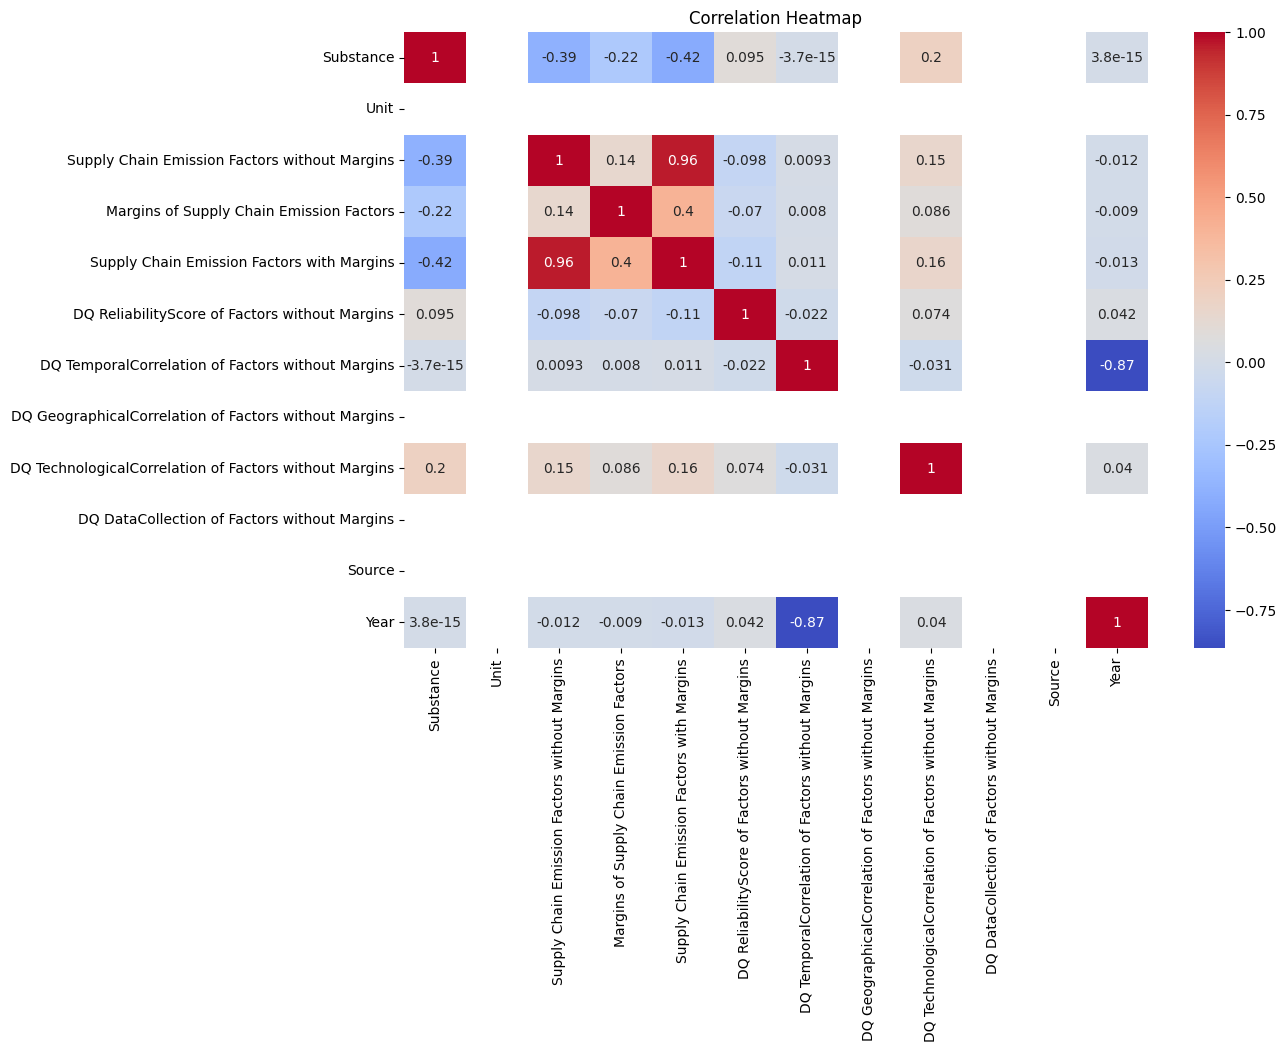

In [66]:
#corelation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [67]:
#week 3
#step 5

In [68]:
#Normalize

In [69]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
Substance,22092.0,1.500000,1.118059,0.0,0.75,1.500,2.250,3.000
Unit,16569.0,0.000000,0.000000,0.0,0.00,0.000,0.000,0.000
Supply Chain Emission Factors without Margins,22092.0,0.084807,0.267039,0.0,0.00,0.002,0.044,7.228
Margins of Supply Chain Emission Factors,22092.0,0.012857,0.078720,0.0,0.00,0.000,0.000,3.349
DQ ReliabilityScore of Factors without Margins,22092.0,3.308030,0.499643,2.0,3.00,3.000,4.000,4.000
DQ TemporalCorrelation of Factors without Margins,22092.0,2.571429,0.494883,2.0,2.00,3.000,3.000,3.000
DQ GeographicalCorrelation of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.00,1.000,1.000,1.000
DQ TechnologicalCorrelation of Factors without Margins,22092.0,2.632129,1.135661,1.0,1.00,3.000,3.000,5.000
DQ DataCollection of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.00,1.000,1.000,1.000
Source,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [126]:
X_scaled[0].min(),X_scaled[0].max()

(np.float64(-1.5), np.float64(1.3849614361966767))

In [127]:
np.round(X_scaled.mean()), np.round(X_scaled.std())


(np.float64(-0.0), np.float64(1.0))

In [94]:
#divide and train


In [75]:
x.shape

(22092, 12)

In [129]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [130]:
x_train.shape, x_test.shape

((17673, 11), (4419, 11))

In [131]:
#select model for training

In [78]:
RF_model=RandomForestRegressor(random_state=42)


In [79]:
#traininig

In [132]:
RF_model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [133]:
#predection

In [134]:
RF_model_pred=RF_model.predict(x_test)

In [135]:
RF_model_pred[:20]

array([2.93580000e-01, 1.00000000e-03, 1.16205776e-03, 1.14881870e-03,
       0.00000000e+00, 4.00000000e-03, 1.75474928e-04, 2.22885455e-03,
       2.00000000e-03, 3.93610000e-01, 0.00000000e+00, 1.40000000e-02,
       4.00000000e-03, 7.00000000e-03, 2.22885455e-03, 4.99354880e-04,
       1.04152283e-03, 3.12570000e-01, 9.00000000e-03, 0.00000000e+00])

In [136]:
RF_mse=mean_squared_error(y_test,RF_model_pred)
RF_rmse=np.sqrt(RF_mse)
RF_r2=r2_score(y_test,RF_model_pred)

print(f"MSE:",RF_mse)
print("R2 Score:",RF_r2)

MSE: 3.8629853188380865e-05
R2 Score: 0.9993122760046654


In [137]:
from sklearn.linear_model import LinearRegression
LR_model=LinearRegression()

LR_model.fit(x_train,y_train)

LR_y_pred=LR_model.predict(x_test)

LR_mse=mean_squared_error(y_test,LR_y_pred)
LR_rmse=np.sqrt(LR_mse)
LR_r2=r2_score(y_test,LR_y_pred)

print(f'RMSE:{LR_rmse}')
print(f'R2 Score:{LR_r2}')

RMSE:0.00028073720809576754
R2 Score:0.9999985968920896


In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create and train the model
LR_model = LinearRegression()
LR_model.fit(x_train, y_train)

# Predict on test data
LR_y_pred = LR_model.predict(x_test)

# Calculate evaluation metrics
LR_mse = mean_squared_error(y_test, LR_y_pred)
LR_rmse = np.sqrt(LR_mse)
LR_r2 = r2_score(y_test, LR_y_pred)

# Print results
print(f'RMSE: {LR_rmse}')
print(f'R2 Score: {LR_r2}')


RMSE: 0.00028073720809576754
R2 Score: 0.9999985968920896


In [104]:
#Hyperparameter Tuning

In [105]:
param_grid = {
    'n_estimators': [100,200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],

}
#perform grid
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1)
#fit  grid
grid_search.fit(x_train, y_train)
#best model
best_model = grid_search.best_estimator_
print("Best Model:",grid_search.best_params_)

Best Model: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [106]:
#use best parameter for prediction

In [113]:
y_pred_best = best_model.predict(x_test)

HP_mse = mean_squared_error(y_test, y_pred_best)
HP_rmse = np.sqrt(HP_mse)
HP_r2 = r2_score(y_test, y_pred_best)

print(f'RMSE: {HP_rmse}')
print(f'R2 Score: {HP_r2}')

RMSE: 0.006215291882798495
R2 Score: 0.9993122760046654


In [115]:
#7 comparative study

In [117]:
results = {
    'Model': ['Random Forest (Default)', 'Linear Regression', 'Random Forest (Tuned)'],
    'MSE': [RF_mse, LR_mse, HP_mse],
    'RMSE': [RF_rmse, LR_rmse, HP_rmse],
    'R2': [RF_r2, LR_r2, HP_r2]
}
comparison_df = pd.DataFrame(results)
print(comparison_df)

                     Model           MSE      RMSE        R2
0  Random Forest (Default)  3.862985e-05  0.006215  0.999312
1        Linear Regression  7.881338e-08  0.000281  0.999999
2    Random Forest (Tuned)  3.862985e-05  0.006215  0.999312


In [118]:
#save model encoder

In [119]:
!mkdir models

In [120]:
joblib.dump(best_model, 'models/LR_model.pkl')    # Save the best model
joblib.dump(scaler, 'models/scaler.pkl') # Save the scaler used for normalization

['models/scaler.pkl']